Fundamental Matrix:
 [[-7.50773029e-08  6.87213302e-06 -2.52084118e-03]
 [ 2.67420202e-06  3.20672657e-08 -6.40058131e-04]
 [-1.19727335e-03 -1.94576665e-03  1.00000000e+00]]


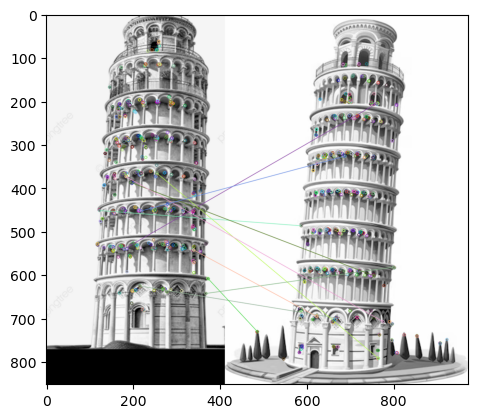

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1, img2 = cv2.imread('f1.png', 0), cv2.imread('f2.png', 0)
kp1, des1 = cv2.ORB_create().detectAndCompute(img1, None)
kp2, des2 = cv2.ORB_create().detectAndCompute(img2, None)
matches = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True).match(des1, des2)
pts1, pts2 = np.float32([kp1[m.queryIdx].pt for m in matches]), np.float32([kp2[m.trainIdx].pt for m in matches])
F, _ = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

print("Fundamental Matrix:\n", F)
plt.imshow(cv2.cvtColor(cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None), cv2.COLOR_BGR2RGB))